In [30]:
import scipy
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate heavy tail data
np.random.seed(0)
heavy_data = scipy.stats.cauchy.rvs(size=1000)

# Generate skew data
skew_data = scipy.stats.skewnorm.rvs(a=5, size=1000)

# Generate heavy tail with skew
heavy_skew_data = np.power(1.1, scipy.stats.cauchy.rvs(size=1000))


def plot_dists(dists, titles, super_title):
    fig, ax = plt.subplots(1, len(dists), figsize=(15, 5))
    for i, dist in enumerate(dists):
        ax[i].hist(dist, bins=100, density=True)
        ax[i].set_title(titles[i])
        # Add mean, median, variance to legend
        ax[i].legend([f"Mean: {np.mean(dist):.2f}\nMedian: {np.median(dist):.2f}\nVariance: {np.var(dist):.2f}"])
    fig.suptitle(super_title)

    # Now plot but scale y axis using log
    fig, ax = plt.subplots(1, len(dists), figsize=(15, 5))
    for i, dist in enumerate(dists):
        ax[i].hist(dist, bins=100, density=True)
        ax[i].set_yscale('log')
        ax[i].set_title(titles[i])
        ax[i].legend([f"Mean: {np.mean(dist):.2f}\nMedian: {np.median(dist):.2f}\nVariance: {np.var(dist):.2f}"])
    fig.suptitle(super_title + " (log scale)")
    

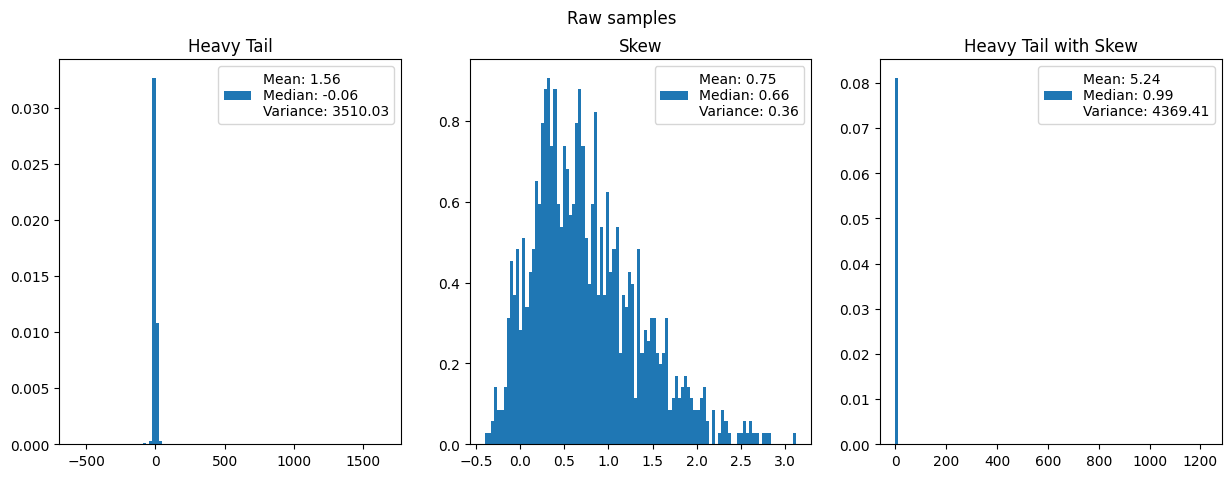

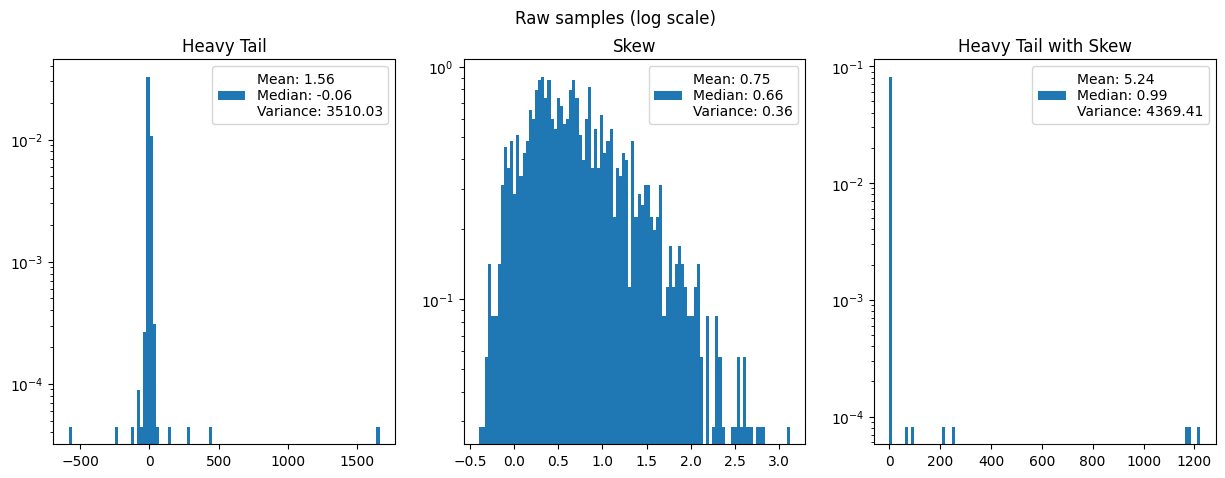

In [31]:

# Plot them
_ = plot_dists([heavy_data, skew_data, heavy_skew_data], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Raw samples")


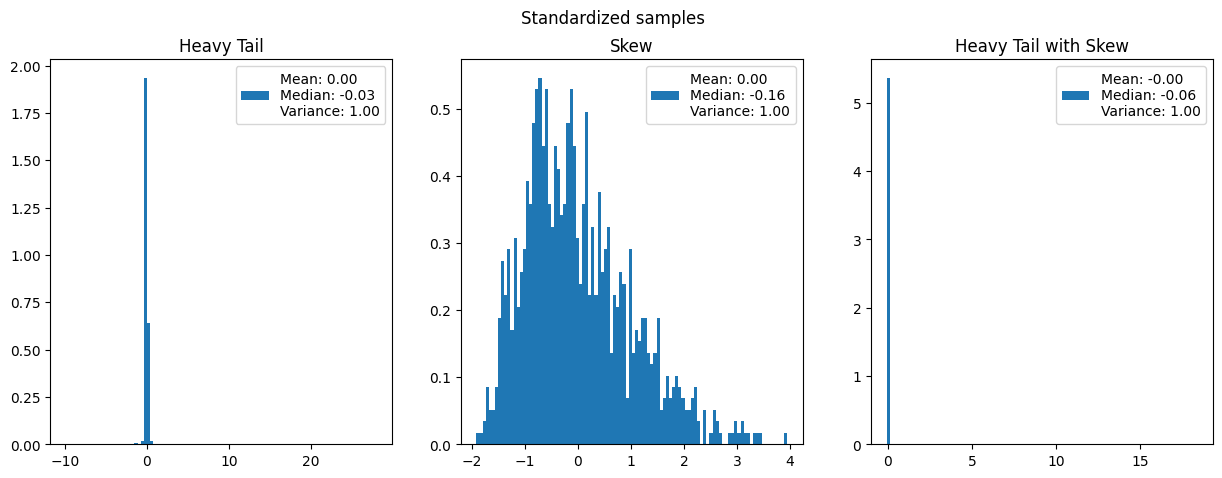

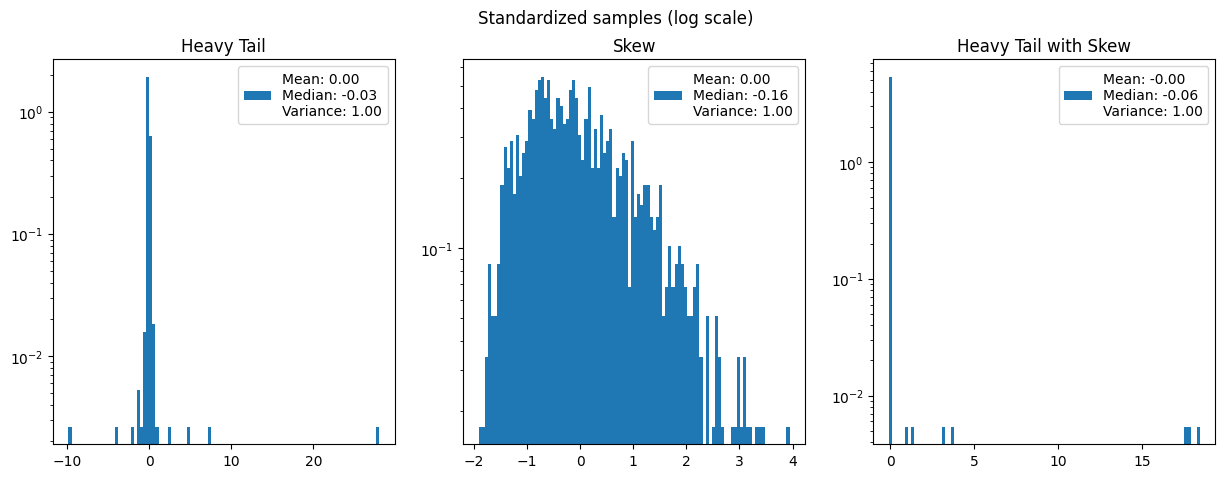

In [32]:
# Standardize them all and plot
heavy_scaled = StandardScaler().fit_transform(heavy_data.reshape(-1, 1))
skew_scaled = StandardScaler().fit_transform(skew_data.reshape(-1, 1))
heavy_skew_scaled = StandardScaler().fit_transform(heavy_skew_data.reshape(-1, 1))

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Standardized samples")


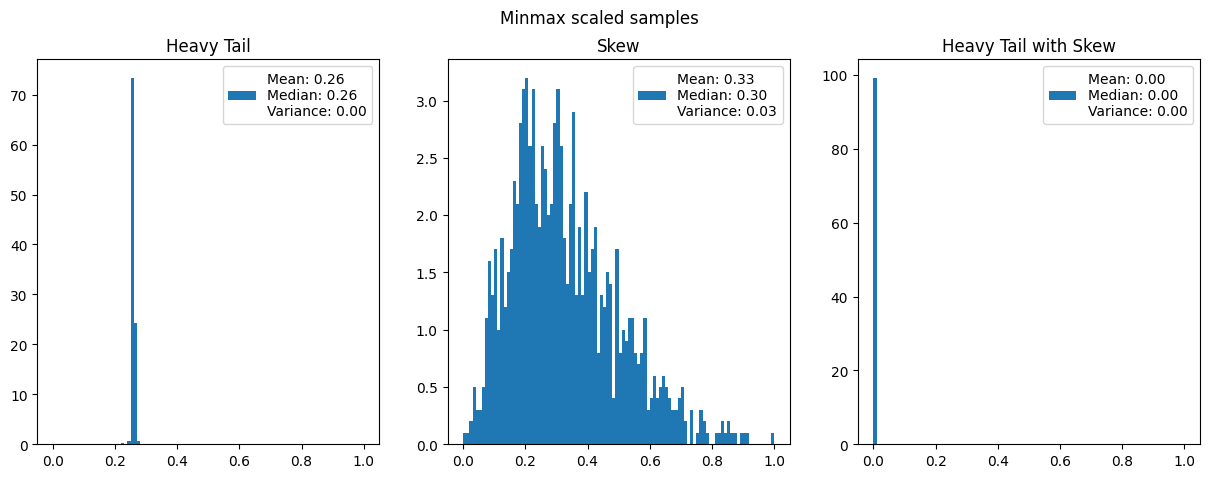

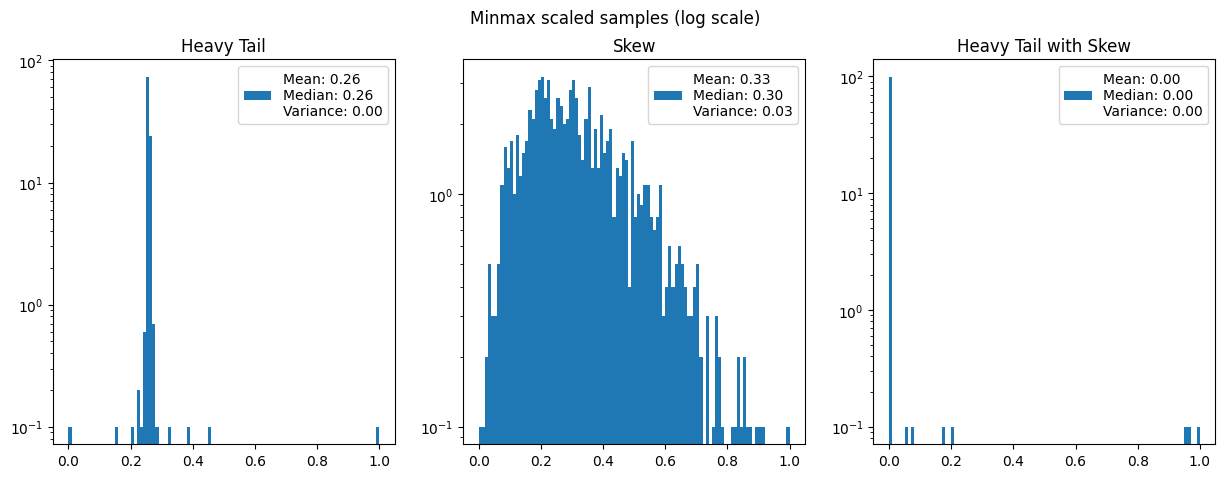

In [33]:
# Now scale to [0,1]
heavy_scaled = (heavy_data - np.min(heavy_data)) / (np.max(heavy_data) - np.min(heavy_data))
skew_scaled = (skew_data - np.min(skew_data)) / (np.max(skew_data) - np.min(skew_data))
heavy_skew_scaled = (heavy_skew_data - np.min(heavy_skew_data)) / (np.max(heavy_skew_data) - np.min(heavy_skew_data))

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Minmax scaled samples")


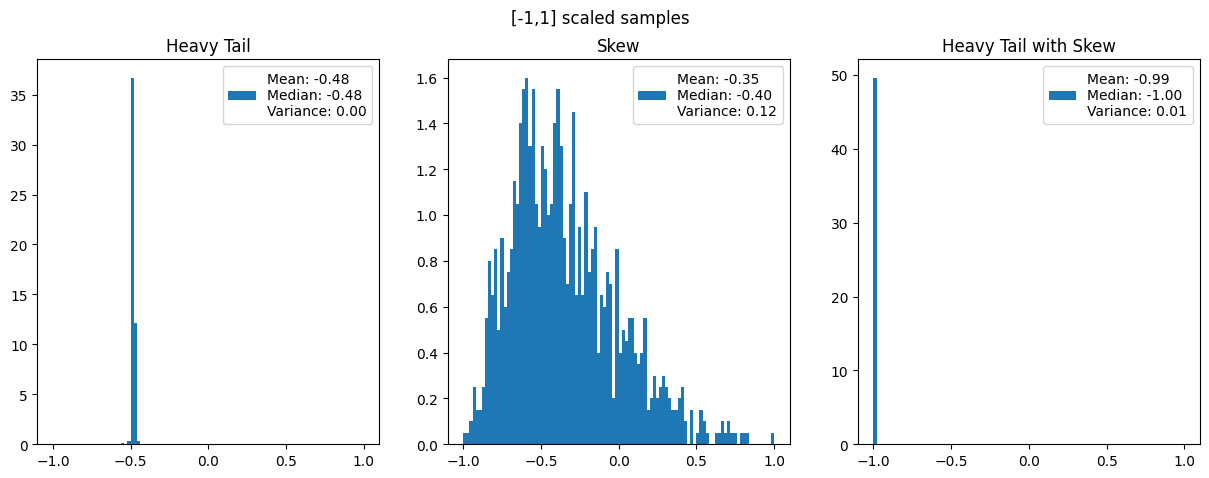

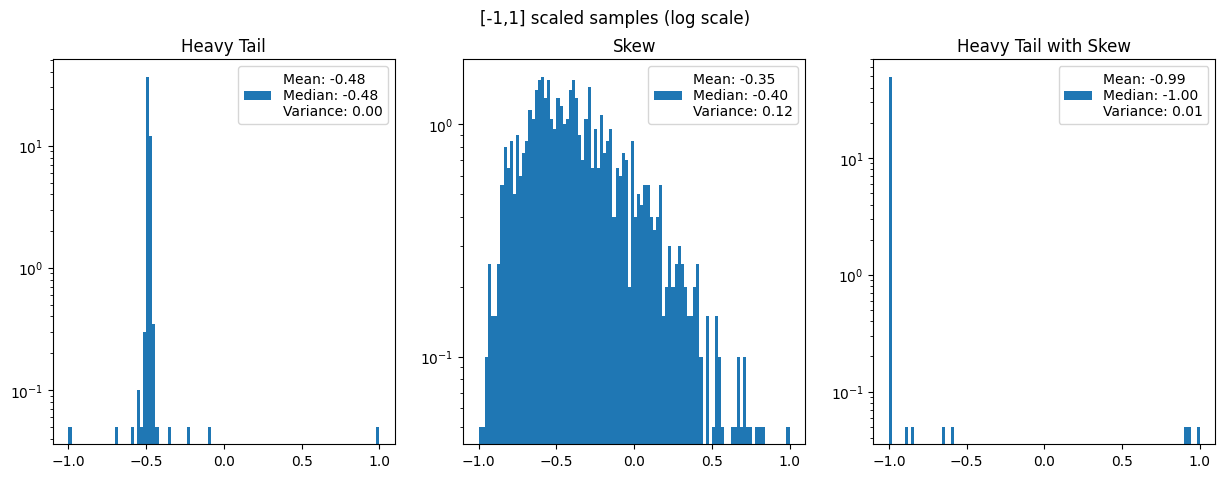

In [34]:
# Now to [-1,1]
heavy_scaled = (heavy_data - np.min(heavy_data)) / (np.max(heavy_data) - np.min(heavy_data))
heavy_scaled = heavy_scaled * 2 - 1
skew_scaled = (skew_data - np.min(skew_data)) / (np.max(skew_data) - np.min(skew_data))
skew_scaled = skew_scaled * 2 - 1
heavy_skew_scaled = (heavy_skew_data - np.min(heavy_skew_data)) / (np.max(heavy_skew_data) - np.min(heavy_skew_data))
heavy_skew_scaled = heavy_skew_scaled * 2 - 1

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "[-1,1] scaled samples")

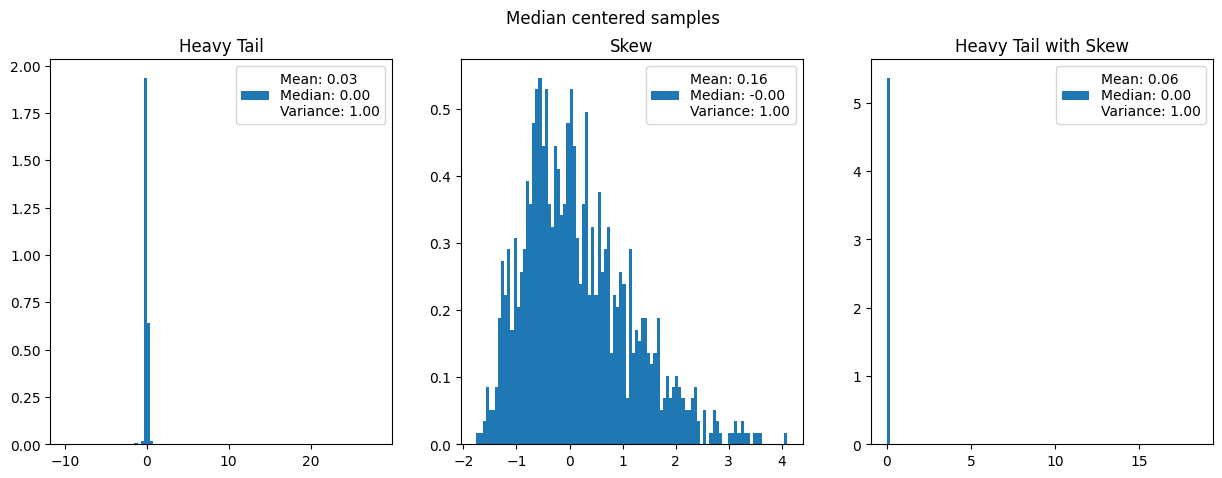

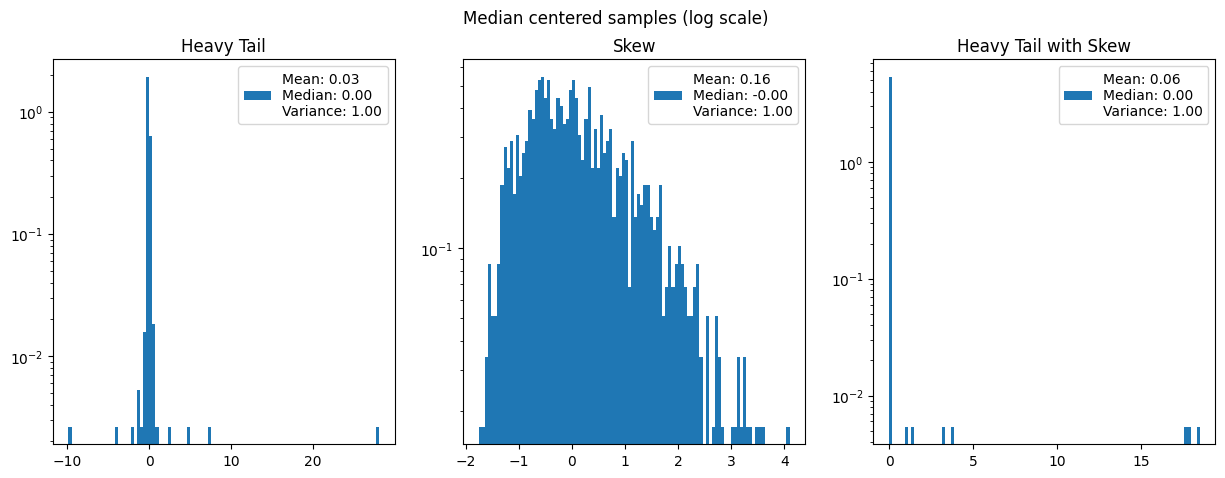

In [35]:
# Scale so median is at 0 and small absolute values
heavy_scaled = (heavy_data - np.median(heavy_data))/np.std(heavy_data)
skew_scaled = (skew_data - np.median(skew_data))/np.std(skew_data)
heavy_skew_scaled = (heavy_skew_data - np.median(heavy_skew_data))/np.std(heavy_skew_data)

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Median centered samples")

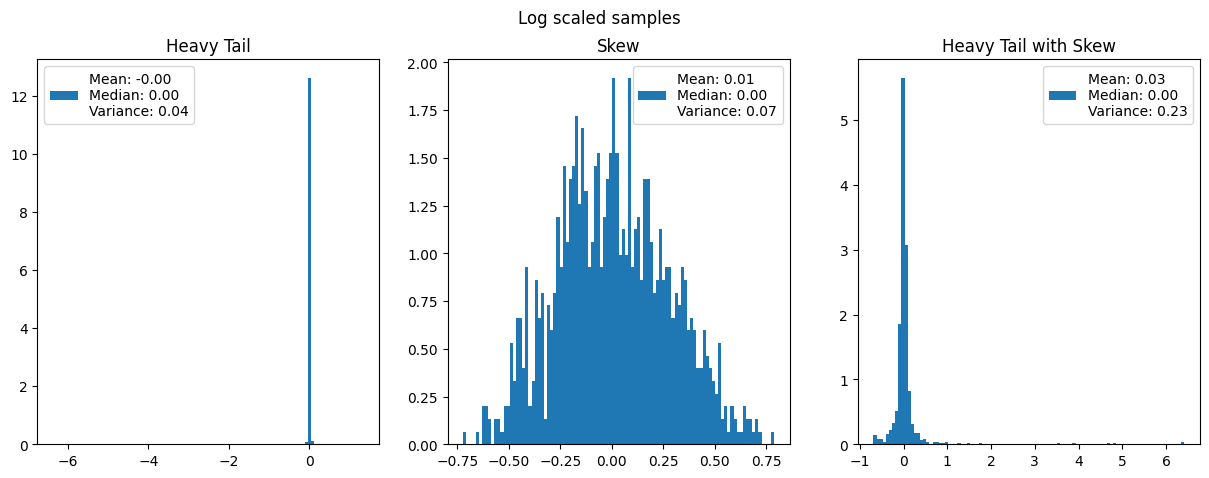

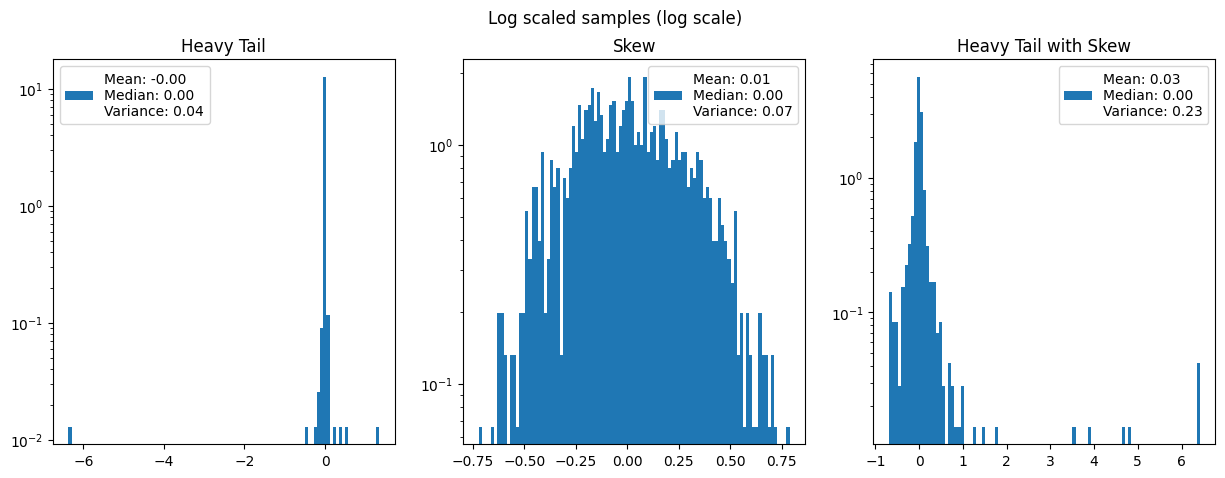

In [36]:
# Non-linear scaling, post-centred 0
heavy_scaled = np.log(heavy_data - np.min(heavy_data) + 1)
heavy_scaled = heavy_scaled - np.median(heavy_scaled)
skew_scaled = np.log(skew_data - np.min(skew_data) + 1)
skew_scaled = skew_scaled - np.median(skew_scaled)
heavy_skew_scaled = np.log(heavy_skew_data - np.min(heavy_skew_data) + 1)
heavy_skew_scaled = heavy_skew_scaled - np.median(heavy_skew_scaled)

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Log scaled samples")

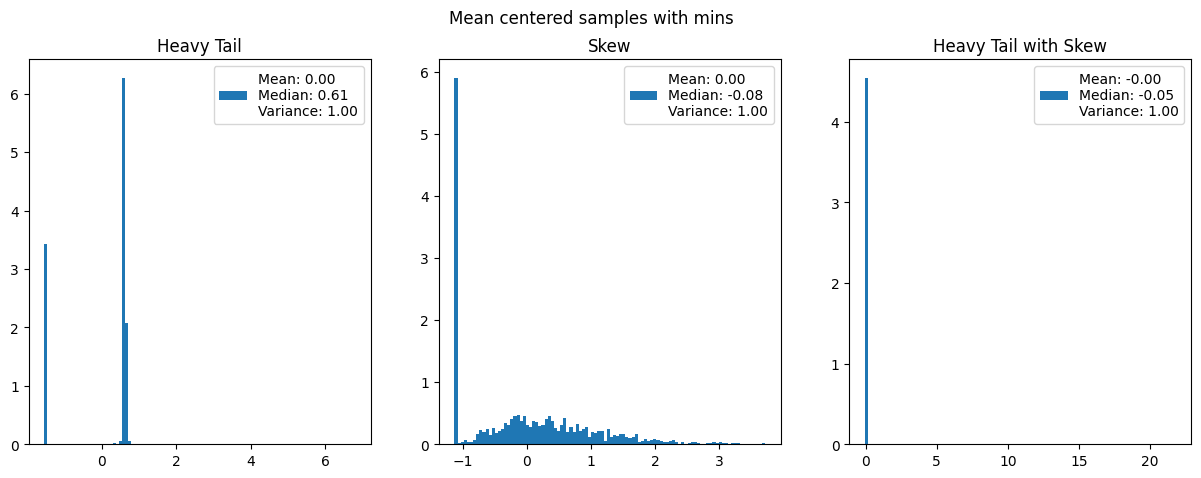

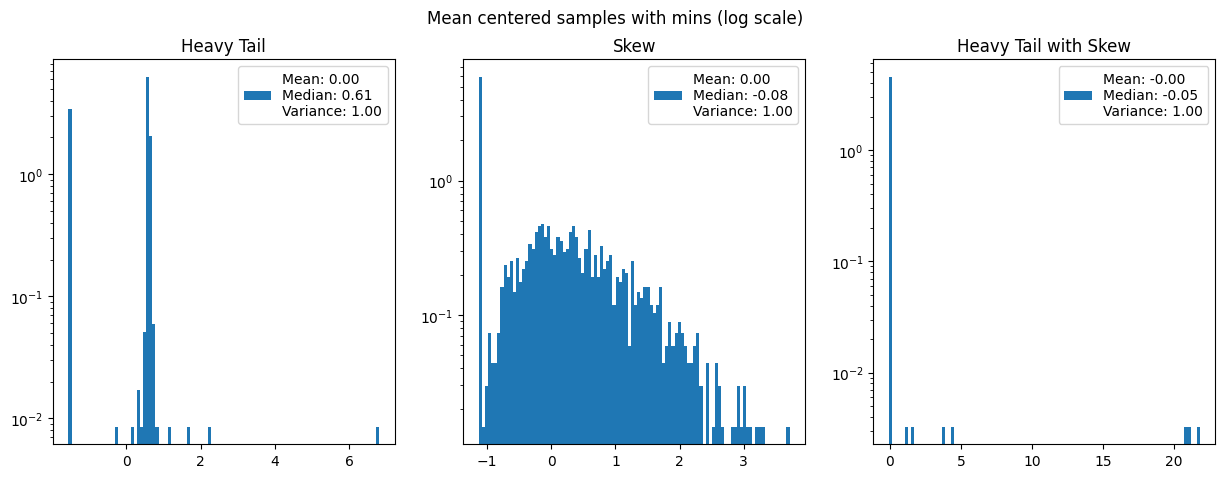

In [39]:
# Ok so how does adding a bunch of min values affect the variance?
frac_ones = 0.4
ones = np.ones(int(frac_ones*len(heavy_data)))
heavy_data_with_mins = np.concatenate([heavy_data, ones*np.min(heavy_data)])
skew_data_with_mins = np.concatenate([skew_data, ones*np.min(skew_data)])
heavy_skew_data_with_mins = np.concatenate([heavy_skew_data, ones*np.min(heavy_skew_data)])

heavy_scaled = (heavy_data_with_mins - np.mean(heavy_data_with_mins))/np.std(heavy_data_with_mins)
skew_scaled = (skew_data_with_mins - np.mean(skew_data_with_mins))/np.std(skew_data_with_mins)
heavy_skew_scaled = (heavy_skew_data_with_mins - np.mean(heavy_skew_data_with_mins))/np.std(heavy_skew_data_with_mins)

plot_dists([heavy_scaled, skew_scaled, heavy_skew_scaled], ['Heavy Tail', 'Skew', 'Heavy Tail with Skew'], "Mean centered samples with mins")